<img src="./images/descarga.png">

# 1. Medicamentos

### Trabajo para el modulo "Programacion en Python"

En primer lugar crearemos un objeto llamado medicamento que almacenara la informacion relevante para nuestro trabajo. En nuestro caso sera el nombre, laboratorio, principios activos, problemas de comercializacion, si necesita prescripcion medica, si afecta a la conduccion, si tiene problemas de suministro y el numero de unidades disponibles en nuestra farmacia. 

In [1]:
class Medicamento(object):
    """ Este objeto representa un Medicamento.
    
    Atributos
    ---------
    nombre = string
    laboratorio = string
    principios = string
    comercializado = boolean
    observaciones = boolean
    conduccion = boolean
    suministro = int
    existencias = int
    
    """
    def __init__(self, nombre_med, lab_med, p_act, comer, obs, afect_cond, prob_sum, exist):
        self.nombre = nombre_med
        self.laboratorio = lab_med 
        self.principios = p_act 
        self.comercializado = comer 
        self.observaciones = obs
        self.conduccion = afect_cond
        self.suministro = prob_sum
        self.existencias = exist
    def __str__(self):
        datos = "Nombre: " + self.nombre + "\nLaboratorio: " + self.laboratorio + "\nPrincipios Activos: " + self.principios + "\nComercializado: " + str(self.comercializado) + "\nPrescripcion: " + str(self.observaciones) + "\nAfecta a conduccion: " + str(self.conduccion) + "\nProblemas de suministro: " + str(self.suministro) + "\nStock: " + str(self.existencias)
        return datos
 

Creamos un objeto de prueba, que en este caso sera la famosa aspirina de Bayer. Esto nos permitira comprobar el buen funcionamiento de nuestro objeto.

In [2]:
med1 = Medicamento("Aspirina", "Bayer", "Ácido Acetilsalicílico", True, False, False, False, 0)

Comprobamos que podemos acceder a un dato determinado de nuestro objeto, en este caso si tienes problemas de suministro:

In [3]:
print(med1.suministro)

False


Comprobamos que podemos acceder a otro dato, como el laboratorio del medicamento:

In [4]:
print(med1.laboratorio)

Bayer


Comprobamos que podemos acceder a todos los datos del medicamento gracias a la definicion del metodo especial __str__:

In [5]:
print(med1)

Nombre: Aspirina
Laboratorio: Bayer
Principios Activos: Ácido Acetilsalicílico
Comercializado: True
Prescripcion: False
Afecta a conduccion: False
Problemas de suministro: False
Stock: 0


# 2. Inventario: Carga y creacion
Ahora vamos a diseñar un programa para la carga de un archivo .odt (OpenDocument) externo y su lectura. Se ha elegido el formato .odt debido a que es el estandar de openoffice y creo que hay que estandarizar mas el software libre.  Comenzaremos con un archivo de prueba de solo 3 medicamentos y asi poder hacer pruebas antes de cargar el archivo completo. Estos nos permitira hacer diferentes pruebas a nuestro gusto sin la gran perdida de tiempo que conlleva la carga del archivo completo.

In [6]:
from pyexcel_ods import get_data

data = get_data("prueba.ods")
f = data['Hoja1']

lista_original = {}
for i in range(1,len(f)):
    lista_original[f[i][0]] = {f[i][1], f[i][2], f[i][7], f[i][9], f[i][11], f[i][13], f[i][14]}
print(lista_original)

{'40537': {'H.A.C. Pharma', 'INDOMETACINA', 'NO', 'Medicamento Sujeto A Prescripción Médica', 'INACID 25 mg CAPSULAS DURAS', 'SI'}, '7235': {'PASSIFLORINE SOLUCION ORAL', 'NO', 'Sin Receta', 'PASSIFLORA INCARNATA EXTO, SALIX ALBA EXTO, CRATAEGUS OXYACANTHA TINTURA', 'Chiesi España, S.A.', 'SI'}, '18329': {'TIOBARBITAL BRAUN 1 G', 'NO', 'TIOPENTAL SODICO', 'Uso Hospitalario', 'B. Braun Medical, S.A.', 'SI'}, 52412: {'TIOBARBITAL BRAUN 1 G', 'NO', 'TIOPENTAL SODICO', 'Uso Hospitalario', 'B. Braun Medical, S.A.', 'SI'}, 42547: {'TIOBARBITAL BRAUN 1 G', 'NO', 'TIOPENTAL SODICO', 'Uso Hospitalario', 'B. Braun Medical, S.A.', 'SI'}, '57942': {'Medicamento Sujeto A Prescripción Médica. Tratamiento De Larga Duración', 'DIAFUSOR 5 mg/24 H. PARCHES TRANSDERMICOS', 'NITROGLICERINA', 'NO', 'Pierre Fabre Iberica, S.A.'}, '17128': {'METADONA HIDROCLORURO', 'NO', 'Medicamento Sujeto A Prescripción Medica. Estupefacientes', 'Esteve Pharmaceuticals, S.A.', 'METASEDIN INYECTABLE', 'SI'}, '40001': {'H.A.

Ahora que hemos comprobado que la importacion del archivo con los campos que nos interesa funciona perfectamente. Vamos a crear el programa de carga de archivo con el campo de numero de ejemplares iniciado a 2. Aqui es donde tambien haremos la comprobacion de si el medicamento esta sujero a prescripcion medica y convierta ese campo de tipo string a boolean.

In [17]:
#Definimos el objeto medicamento del apartado anterior con el campo stock iniciado a 2 unidades.

class Medicamento(object):
    """ Clase Medicamento. Representa un Medicamento.
    Atributos
    ---------
    nombre = string
    laboratorio = string
    principios = string
    comercializado = boolean
    observaciones = boolean
    conduccion = boolean
    suministro = int
    
    """
    def __init__(self, nombre_med, lab_med, p_act, comer, obs, afect_cond, prob_sum):
        self.nombre = nombre_med
        self.laboratorio = lab_med 
        self.principios = p_act 
        self.comercializado = comer 
        self.observaciones = obs
        self.conduccion = afect_cond
        self.suministro = prob_sum
        self.stock = 2
    def __str__(self):
        datos = "Nombre: " + self.nombre + "\nLaboratorio: " + self.laboratorio + "\nPrincipios Activos: " + self.principios + "\nComercializado: " + str(self.comercializado) + "\nNecesita Prescripcion: " + str(self.observaciones) + "\nAfecta a conduccion: " + str(self.conduccion) + "\nProblemas de suministro: " + str(self.suministro) + "\nStock: " + str(self.stock)
        return datos
    
#Importamos los datos del archivo externo prueba.ods

from pyexcel_ods import get_data
data = get_data("prueba.ods")

#Creamos la siguiente variable para agilizar la escritura de codigo.

f = data['Hoja1']               


#Eliminamos del campo observaciones las tildes y ponemos toda la cadena de texto en minuscula para poder comprobar 
#su texto y que no haya problemas en la identificacion del campo observaciones.

from unidecode import unidecode

for i in range(1,len(f)):
    print(f[i][11] + " <--> Observaciones del medicamento: " + str(i))
    f[i][11]=unidecode(f[i][11])
    f[i][11]=f[i][11].lower()
    print(f[i][11] + " <--> Observaciones modificadas del medicamento: " + str(i))
    
print(" ")  
    
#Modificamos la lista comprobando si el campo observaciones incluye el texto "medicamento sujero a prescripcion medica" y en ese
#caso ponemos ese campo a True, en caso contrario a False.

lista_original = {}
for i in range(1,len(f)):
    if 'medicamento sujeto a prescripcion medica' in f[i][11]:
        lista_original[f[i][0]] = [f[i][1], f[i][2], f[i][7], f[i][9], True, f[i][13], f[i][14]]
    else:
        lista_original[f[i][0]] = [f[i][1], f[i][2], f[i][7], f[i][9], False, f[i][13], f[i][14]]
print(lista_original)
print(" ")
print(lista_original.keys())
print(" ")

#Ahora que la lista solo contiene los datos de interes, eliminamos los registros con todos los campos iguales, excepto 
#el numero de registro.

lista_limpia = {}
for key,value in lista_original.items():
    if value not in lista_limpia.values():
        lista_limpia[key] = value
print(lista_limpia)
print(" ")

print(lista_limpia.keys())
print(" ")

#Ahora que tenemos la lista completamente preparada, creamos el inventario con objetos de tipo Medicamento.

medicamentos = {}
lf = list(lista_limpia.values())
key = list(lista_limpia.keys())
print(lf)
print(" ")

for j in range(0,len(lf)):
    inventario[key[j]] = Medicamento(lf[j][0], lf[j][1], lf[j][2], lf[j][3], lf[j][4], lf[j][5], lf[j][6])                        

#Imprimimos las keys del inventario y imprimimos varias de ellas para ver el correcto funcionamiento.    
    
print(inventario.keys())
print(" ")
print(inventario["40537"])
print(" ")
print(inventario["7235"])
print(" ")
print(inventario["18329"])
print(" ")


Medicamento Sujeto A Prescripción Médica <--> Observaciones del medicamento: 1
medicamento sujeto a prescripcion medica <--> Observaciones modificadas del medicamento: 1
Sin Receta <--> Observaciones del medicamento: 2
sin receta <--> Observaciones modificadas del medicamento: 2
Uso Hospitalario <--> Observaciones del medicamento: 3
uso hospitalario <--> Observaciones modificadas del medicamento: 3
Uso Hospitalario <--> Observaciones del medicamento: 4
uso hospitalario <--> Observaciones modificadas del medicamento: 4
Uso Hospitalario <--> Observaciones del medicamento: 5
uso hospitalario <--> Observaciones modificadas del medicamento: 5
Medicamento Sujeto A Prescripción Médica. Tratamiento De Larga Duración <--> Observaciones del medicamento: 6
medicamento sujeto a prescripcion medica. tratamiento de larga duracion <--> Observaciones modificadas del medicamento: 6
Medicamento Sujeto A Prescripción Medica. Estupefacientes <--> Observaciones del medicamento: 7
medicamento sujeto a presc

Ahora que vemos el buen funcionamiento de la carga de archivo odt y creacion de inventario en objetos tipo Medicamento, crearemos el programa de guardado y carga del inventario completo.

In [53]:
class Medicamento(object):
    """ Clase Medicamento. Representa un Medicamento.
    Atributos
    ---------
    nombre = string
    laboratorio = string
    principios = string
    comercializado = boolean
    observaciones = boolean
    conduccion = boolean
    suministro = int
    
    """
    def __init__(self, nombre_med, lab_med, p_act, comer, obs, afect_cond, prob_sum):
        self.nombre = nombre_med
        self.laboratorio = lab_med 
        self.principios = p_act 
        self.comercializado = comer 
        self.observaciones = obs
        self.conduccion = afect_cond
        self.suministro = prob_sum
        self.stock = 2
    def __str__(self):
        datos = "Nombre: " + self.nombre + "\nLaboratorio: " + self.laboratorio + "\nPrincipios Activos: " + self.principios + "\nComercializado: " + str(self.comercializado) + "\nPrescripcion: " + str(self.observaciones) + "\nAfecta a conduccion: " + str(self.conduccion) + "\nProblemas de suministro: " + str(self.suministro) + "\nStock: " + str(self.stock)
        return datos

#Importamos la libreria pyexcel_ods para la importacion de archivos y carga del inventario.
    
from pyexcel_ods import get_data

data = get_data("prueba.ods")
f = data['Hoja1']

#Importamos la libreria unidecode para la comprobacion y analisis del campo observaciones.

from unidecode import unidecode

#Comprobamos por medio de un bucle el campo de observaciones y imprimimos el antes y despues de cada iteracion 
#para comprobar el buen funcionamiento del bucle. Sustituimos el dato con mayusculas, minusculas y posibles tildes
#por un dato en minusculas y sin ningun tipo de caracter especial.

for i in range(1,len(f)):
    print(f[i][11] + " <--> Observaciones del medicamento: " + str(i))
    f[i][11]=unidecode(f[i][11])
    f[i][11]=f[i][11].lower()
    print(f[i][11] + " <--> Observaciones modificadas del medicamento: " + str(i))

print(" ")

#Ahora que el campo observaciones esta limpio de caracteres especiales, comprobamos si es un medicamento sujeto a prescripcion
#medica o no. Basicamente convertimos el dato de tipo string a tipo booleano.
        
lista_original = {}
for i in range(1,len(f)):
    if 'medicamento sujeto a prescripcion medica' in f[i][11]:
        lista_original[f[i][0]] = [f[i][1], f[i][2], f[i][7], f[i][9], 'True', f[i][13], f[i][14]]
    else:
        lista_original[f[i][0]] = [f[i][1], f[i][2], f[i][7], f[i][9], 'False', f[i][13], f[i][14]]

#Imprimimos la lista de medicamentos para comprobar que ya contienen los datos de la forma que deseamos. 
        
print(lista_original)
print(" ")

#Imprimimos las claves de la lista original para ver cuantos medicamentos existen, en el siguiente apartado, cuando 
#limpiemos la lista de medicamentos repetidos verificaremos que si se han eliminado.

print(lista_original.keys())
print(" ")

#Comprobamos si existen medicamentos iguales en los que solo cambia el numero de registro, en ese caso lo eliminamos.
 
lista_limpia = {}
for key,value in lista_original.items():
    if value not in lista_limpia.values():
        lista_limpia[key] = value
        
#Imprimimos la lista limpia de medicamentos repetidos y sus claves para verificar que este metodo ha funcionado.
        
print(lista_limpia)
print(" ")
print(lista_limpia.keys())
print(" ")

key = list(lista_limpia.keys())
values = list(lista_limpia.values())

#Creamos una estructura para guardar como archivo JSON.

inventario = {}
for i in range(0, len(key)):
    inventario[key[i]] = {"Nombre": values[i][0],"Laboratorio": values[i][1],"Principios Activos": values[i][2],"Comercializado?": values[i][3],"Prescripcion Medica": values[i][4],"Afecta a la conduccion?": values[i][5],"Problemas de Suministro?": values[i][6]}

#Guardamos el archivo en formato JSON en dos formatos. Uno para que sea facil de visualizar con "indent=4", y otro para
#minimizar su tamaño sin espacios.

import json
with open('prueba_visible.json', 'w') as file:
    json.dump(inventario, file, indent=4)
    
with open('prueba.json', 'w') as file:
    json.dump(inventario, file)
    
#Probamos la carga del archivo limpio y creacion de inventario.
    
with open('prueba.json', 'r') as file:
    inventario_cargado = json.load(file)

claves = list(inventario_cargado.keys())
valores = list(inventario_cargado.values())

#Creamos el inventario, esta vez llamado "inventario_final", a partir del archivo JSON con la informacion seleccionada, 
#filtrada y sin medicamentos repetidos.

inventario_final = {}
for i in range (0, len(claves)):
    inventario_final[claves[i]] = Medicamento(valores[i]["Nombre"], valores[i]["Laboratorio"], valores[i]["Principios Activos"], valores[i]["Comercializado?"], valores[i]["Prescripcion Medica"], valores[i]["Afecta a la conduccion?"], valores[i]["Problemas de Suministro?"])

#Comprobamos varias respuestas con el inventario cargado.   
    
print(inventario_final[claves[0]])
print("")
print(inventario_final[claves[0]].nombre)
print("")
print(inventario_final[claves[0]].laboratorio)
print("")
print("El laboratorio del medicamento " + str(inventario_final[claves[2]].nombre) + " es " + str(inventario_final[claves[2]].laboratorio))
print("El stock del medicamento con numero de registro " + str(claves[0]) + " es " + str(inventario_final[claves[0]].stock))
print("")

Medicamento Sujeto A Prescripción Médica <--> Observaciones del medicamento: 1
medicamento sujeto a prescripcion medica <--> Observaciones modificadas del medicamento: 1
Sin Receta <--> Observaciones del medicamento: 2
sin receta <--> Observaciones modificadas del medicamento: 2
Uso Hospitalario <--> Observaciones del medicamento: 3
uso hospitalario <--> Observaciones modificadas del medicamento: 3
Uso Hospitalario <--> Observaciones del medicamento: 4
uso hospitalario <--> Observaciones modificadas del medicamento: 4
Uso Hospitalario <--> Observaciones del medicamento: 5
uso hospitalario <--> Observaciones modificadas del medicamento: 5
Medicamento Sujeto A Prescripción Médica. Tratamiento De Larga Duración <--> Observaciones del medicamento: 6
medicamento sujeto a prescripcion medica. tratamiento de larga duracion <--> Observaciones modificadas del medicamento: 6
Medicamento Sujeto A Prescripción Medica. Estupefacientes <--> Observaciones del medicamento: 7
medicamento sujeto a presc

# 3. Existencias, carga y grabacion del inventario:

En el momento de carga de la tabla de medicamentos, el dato relativo al stock se generara aleatoriamente. Haremos que se distribuya segun una distribucion de Poisson, de media 2 para los medicamentos con problemas de suministro, y 5 para los que no tienen problemas de suministro.  
  
Probaremos ahora el generador de variables de Poisson y lo visualizaremos en un grafico:


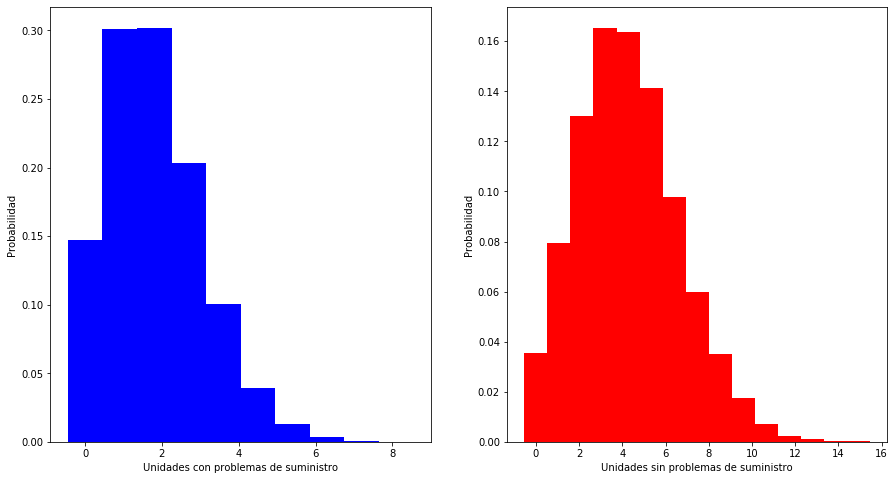

In [54]:
import numpy as np
import matplotlib.pyplot as plt

num_medicamentos = 20000
muestra1 = np.random.poisson(2, num_medicamentos)
muestra2 = np.random.poisson(5, num_medicamentos)



fig, axes=plt.subplots(ncols=2,figsize=(15,8))
axes[0].hist(muestra1, 10, density=True, color="Blue", align='left')
axes[1].hist(muestra2, 15, density=True, color="red", align='left')
axes[0].set(xlabel="Unidades con problemas de suministro",ylabel="Probabilidad")
axes[1].set(xlabel="Unidades sin problemas de suministro",ylabel="Probabilidad")
axes[0].set_label("Probabilidad")
axes[1].set_label("Probabilidad")
plt.show()


Ahora incluimos el dato adicional stock en nuestro objeto Medicamento y haremos que se genere el inventario con este valor generado por medio de Poisson.

In [25]:
class Medicamento(object):
    """ Clase Medicamento. Representa un Medicamento.
    Atributos
    ---------
    nombre = string
    laboratorio = string
    principios = string
    comercializado = boolean
    observaciones = boolean
    conduccion = boolean
    suministro = int
    
    """
    def __init__(self, nombre_med, lab_med, p_act, comer, obs, afect_cond, prob_sum, stock):
        self.nombre = nombre_med
        self.laboratorio = lab_med 
        self.principios = p_act 
        self.comercializado = comer 
        self.observaciones = obs
        self.conduccion = afect_cond
        self.suministro = prob_sum  
        self.stock = stock
                
    def __str__(self):
        datos = "Nombre: " + self.nombre + "\nLaboratorio: " + self.laboratorio + "\nPrincipios Activos: " + self.principios + "\nComercializado: " + str(self.comercializado) + "\nNecesita Prescripcion: " + str(self.observaciones) + "\nAfecta a conduccion: " + str(self.conduccion) + "\nProblemas de suministro: " + str(self.suministro) + "\nStock: " + str(self.stock)
        return datos

from pyexcel_ods import get_data

data = get_data("prueba.ods")
f = data['Hoja1']

from unidecode import unidecode

for i in range(1,len(f)):
    f[i][11]=unidecode(f[i][11])
    f[i][11]=f[i][11].lower()

lista_original = {}
for i in range(1,len(f)):
    if 'medicamento sujeto a prescripcion medica' in f[i][11]:
        lista_original[f[i][0]] = [f[i][1], f[i][2], f[i][7], f[i][9], True, f[i][13], f[i][14], 0]
    else:
        lista_original[f[i][0]] = [f[i][1], f[i][2], f[i][7], f[i][9], False, f[i][13], f[i][14], 0]
 
lista_limpia = {}
for key,value in lista_original.items():
    if value not in lista_limpia.values():
        lista_limpia[key] = value

key = list(lista_limpia.keys())
values = list(lista_limpia.values())

import numpy as np


inventario = {}
for j in range(0,len(key)):
    if values[j][6] == 'SI':
        stock=np.random.poisson(2)
    else:
        stock=np.random.poisson(5)
    inventario[key[j]] = {"Nombre": values[j][0],"Laboratorio": values[j][1],"Principios Activos": values[j][2],"Comercializado?": values[j][3],"Prescripcion Medica": values[j][4],"Afecta a la conduccion?": values[j][5],"Problemas de Suministro?": values[j][6], "Stock": stock}

import json

with open('prueba_con_stock.json', 'w') as file:
    json.dump(inventario, file)
    
#Probamos la carga del archivo limpio y creacion de inventario.
    
with open('prueba_con_stock.json', 'r') as file:
    inventario_cargado = json.load(file)

claves = list(inventario_cargado.keys())
valores = list(inventario_cargado.values())


#Creamos el inventario, esta vez llamado "inventario_final", a partir del archivo JSON con la informacion seleccionada, 
#filtrada y sin medicamentos repetidos.

inventario_final = {}
for i in range (0, len(claves)):
    inventario_final[claves[i]] = Medicamento(valores[i]["Nombre"], valores[i]["Laboratorio"], valores[i]["Principios Activos"], valores[i]["Comercializado?"], valores[i]["Prescripcion Medica"], valores[i]["Afecta a la conduccion?"], valores[i]["Problemas de Suministro?"], valores[i]["Stock"])

#Comprobamos varias respuestas con el inventario cargado.   
    
print(inventario_final[claves[0]])
print("")
print(inventario_final[claves[3]])
print("")
print(inventario_final[claves[0]].nombre)
print("")
print(inventario_final[claves[0]].laboratorio)
print("")
print("El laboratorio del medicamento " + str(inventario_final[claves[2]].nombre) + " es " + str(inventario_final[claves[2]].laboratorio))
print("El stock del medicamento con numero de registro " + str(claves[0]) + " es " + str(inventario_final[claves[0]].stock))
print("")
print(inventario_final[claves[0]].stock)

Nombre: INACID 25 mg CAPSULAS DURAS
Laboratorio: H.A.C. Pharma
Principios Activos: INDOMETACINA
Comercializado: SI
Necesita Prescripcion: True
Afecta a conduccion: NO
Problemas de suministro: NO
Stock: 7

Nombre: DIAFUSOR 5 mg/24 H. PARCHES TRANSDERMICOS
Laboratorio: Pierre Fabre Iberica, S.A.
Principios Activos: NITROGLICERINA
Comercializado: NO
Necesita Prescripcion: True
Afecta a conduccion: NO
Problemas de suministro: NO
Stock: 4

INACID 25 mg CAPSULAS DURAS

H.A.C. Pharma

El laboratorio del medicamento TIOBARBITAL BRAUN 1 G es B. Braun Medical, S.A.
El stock del medicamento con numero de registro 40537 es 7

7


# 4. Medicamentos sustitutos. 
## a) Creacion de un diccionario para su uso.

In [27]:
import json

with open('prueba_con_stock.json') as file:
    inventario_cargado = json.load(file)
    
claves = list(inventario_cargado.keys())
valores = list(inventario_cargado.values())

inventario_final = {}
for i in range (0, len(claves)):
    inventario_final[claves[i]] = Medicamento(valores[i]["Nombre"], valores[i]["Laboratorio"], valores[i]["Principios Activos"], valores[i]["Comercializado?"], valores[i]["Prescripcion Medica"], valores[i]["Afecta a la conduccion?"], valores[i]["Problemas de Suministro?"], valores[i]["Stock"])


lista_equivalentes = {}

for i in range(0, len(inventario_final)):
    principios1=inventario_final[claves[i]].principios
    prescripcion1=inventario_final[claves[i]].observaciones
    principios_separados_i=principios1.split(",")
    lista_equivalentes[claves[i]] = []
    
    for j in range(0, len(inventario_final)):
        principios2=inventario_final[claves[j]].principios
        prescripcion2=inventario_final[claves[j]].observaciones
        principios_separados_j=principios2.split(",")
        if prescripcion1==prescripcion2 or prescripcion1==True:
            if principios_separados_i == principios_separados_j and i != j:
                lista_equivalentes[claves[i]].append(claves[j])
        
print(lista_equivalentes["18329"])
print("")
print(lista_equivalentes)
print("")
print(lista_equivalentes["40537"])

['18002', '52002']

{'40537': [], '7235': [], '18329': ['18002', '52002'], '57942': ['57002'], '17128': [], '18001': ['18329', '52001', '18002', '52002'], '52001': ['18329', '18001', '18002', '52002'], '57002': ['57942'], '18002': ['18329', '52002'], '52002': ['18329', '18002']}

[]


In [1]:
class Medicamento(object):
    """ Clase Medicamento. Representa un Medicamento.
    Atributos
    ---------
    nombre = string
    laboratorio = string
    principios = string
    comercializado = boolean
    observaciones = boolean
    conduccion = boolean
    suministro = int
    existencias = int
    
    
    """
    def __init__(self, nombre_med, lab_med, p_act, comer, obs, afect_cond, prob_sum, sust, stock):
        self.nombre = nombre_med
        self.laboratorio = lab_med 
        self.principios = p_act 
        self.comercializado = comer 
        self.observaciones = obs
        self.conduccion = afect_cond
        self.suministro = prob_sum
        self.stock = stock
        self.sustitutos = sust

    def __str__(self):
        datos = "Nombre: " + self.nombre + "\nLaboratorio: " + self.laboratorio + "\nPrincipios Activos: " + self.principios + "\nComercializado: " + str(self.comercializado) + "\nPrescripcion: " + str(self.observaciones) + "\nAfecta a conduccion: " + str(self.conduccion) + "\nProblemas de suministro: " + str(self.suministro) + "\nStock: " + str(self.stock) + "\nSustitutos: " + str(self.sustitutos)
        return datos
    
    def sustituto(self):
        sust = "Las referencias de los medicamentos sustitutos son: " + str(self.sustitutos)
        return sust
    
    def reponer_auto(self):
        if self.suministro == 'SI':
            self.stock= self.stock + np.random.poisson(2)
        else:
            self.stock= self.stock + np.random.poisson(5)
        return self.stock
    
    def reponer_manual(self, cantidad):
        self.stock = self.stock + cantidad
        return self.stock
    
    def vender(self, cantidad):
        self.stock = self.stock - cantidad
        return self.stock
        

from pyexcel_ods import get_data

data = get_data("prueba.ods")
f = data['Hoja1']

from unidecode import unidecode

for i in range(1,len(f)):
    f[i][11]=unidecode(f[i][11])
    f[i][11]=f[i][11].lower()

lista_original = {}
for i in range(1,len(f)):
    if 'medicamento sujeto a prescripcion medica' in f[i][11]:
        lista_original[f[i][0]] = [f[i][1], f[i][2], f[i][7], f[i][9], True, f[i][13], f[i][14]]
    else:
        lista_original[f[i][0]] = [f[i][1], f[i][2], f[i][7], f[i][9], False, f[i][13], f[i][14]]


lista_limpia = {}
for key,value in lista_original.items():
    if value not in lista_limpia.values():
        lista_limpia[key] = value
        
key = list(lista_limpia.keys())
values = list(lista_limpia.values())        


import numpy as np

inventario = {}
for j in range(0, len(key)):
    if values[j][6] == 'SI':
        stock=np.random.poisson(2)
    else:
        stock=np.random.poisson(5)
    inventario[key[j]] = {"Nombre": values[j][0],"Laboratorio": values[j][1],"Principios Activos": values[j][2],"Comercializado?": values[j][3],"Prescripcion Medica": values[j][4],"Afecta a la conduccion?": values[j][5],"Problemas de Suministro?": values[j][6], "Stock": stock, "Sustitutos": []}

import json

with open('prueba_con_stock.json', 'w') as file:
    json.dump(inventario, file)
    
with open('prueba_con_stock.json', 'r') as file:
    inventario_cargado = json.load(file)
    
claves = list(inventario_cargado.keys())
valores = list(inventario_cargado.values())

inventario_final = {}
for i in range (0, len(claves)):
    inventario_final[claves[i]] = Medicamento(valores[i]["Nombre"], valores[i]["Laboratorio"], valores[i]["Principios Activos"], valores[i]["Comercializado?"], valores[i]["Prescripcion Medica"], valores[i]["Afecta a la conduccion?"], valores[i]["Problemas de Suministro?"], 0 , valores[i]["Stock"])

lista_equivalentes = {}    
for i in range(0, len(inventario_final)):
    principios1=inventario_final[claves[i]].principios
    prescripcion1=inventario_final[claves[i]].observaciones
    principios_separados_i=principios1.split(",")
    lista_equivalentes[claves[i]] = []
    
    for j in range(0, len(inventario_cargado)):
        principios2=inventario_final[claves[j]].principios
        prescripcion2=inventario_final[claves[j]].observaciones
        principios_separados_j=principios2.split(",")
        if prescripcion1==prescripcion2 or prescripcion1==True:
            if principios_separados_i == principios_separados_j and i != j:
                lista_equivalentes[claves[i]].append(claves[j])
                
inventario = {}

lf = list(inventario_final.values())
key = list(inventario_final.keys())
le = lista_equivalentes   

inventario = {}
for j in range(0,len(key)):
    inventario[key[j]]= {"Nombre": lf[j].nombre,"Laboratorio": lf[j].laboratorio,"Principios Activos": lf[j].principios,"Comercializado": lf[j].comercializado,"Necesita prescripcion": lf[j].observaciones,"Afecta a conduccion": lf[j].conduccion,"Problemas de suministro": lf[j].suministro,"Sustitutos": le[key[j]],"Stock": lf[j].stock}
   
with open('inventario_definitivo.json', 'w') as file:
    json.dump(inventario, file, indent=4)


# for j in range(0,len(lf)):
#     inventario[key[j]] = Medicamento(lf[j].nombre, lf[j].laboratorio, lf[j].principios, lf[j].comercializado, lf[j].observaciones, lf[j].conduccion, lf[j].suministro, le[key[j]], lf[j].stock)                     
    

    
# for i in range(0, len(key)):
#     print(inventario[key[i]])
#     print(inventario[key[i]].nombre)
#     print("")


In [2]:
with open('inventario_definitivo.json', 'r') as file:
    inventario = json.load(file)
    
lf = list(inventario.values())
key = list(inventario.keys())

lf[1]["Nombre"]

for j in range(0,len(key)):
    inventario[key[j]] = Medicamento(lf[j]["Nombre"], lf[j]["Laboratorio"], lf[j]["Principios Activos"], lf[j]["Comercializado"], lf[j]["Necesita prescripcion"], lf[j]["Afecta a conduccion"], lf[j]["Problemas de suministro"], lf[j]["Sustitutos"], lf[j]["Stock"])                     
       
print(inventario["40537"])

Nombre: INACID 25 mg CAPSULAS DURAS
Laboratorio: H.A.C. Pharma
Principios Activos: INDOMETACINA
Comercializado: SI
Prescripcion: True
Afecta a conduccion: NO
Problemas de suministro: NO
Stock: 7
Sustitutos: []


In [11]:
inventario['18001'].stock

5

In [6]:
inventario['18001'].reponer_auto()

5

In [10]:
inventario['18001'].reponer_manual(2)

5

In [12]:
inventario['18001'].vender(1)

4

In [ ]:
class Medicamento(object):
    """ Clase Medicamento. Representa un Medicamento.
    Atributos
    ---------
    nombre = string
    laboratorio = string
    principios = string
    comercializado = boolean
    observaciones = boolean
    conduccion = boolean
    suministro = int
    existencias = int
    
    
    """
    def __init__(self, nombre_med, lab_med, p_act, comer, obs, afect_cond, prob_sum, sust, stock):
        self.nombre = nombre_med
        self.laboratorio = lab_med 
        self.principios = p_act 
        self.comercializado = comer 
        self.observaciones = obs
        self.conduccion = afect_cond
        self.suministro = prob_sum
        self.stock = stock
        self.sustitutos = sust

    def __str__(self):
        datos = "Nombre: " + self.nombre + "\nLaboratorio: " + self.laboratorio + "\nPrincipios Activos: " + self.principios + "\nComercializado: " + str(self.comercializado) + "\nPrescripcion: " + str(self.observaciones) + "\nAfecta a conduccion: " + str(self.conduccion) + "\nProblemas de suministro: " + str(self.suministro) + "\nStock: " + str(self.stock) + "\nSustitutos: " + str(self.sustitutos)
        return datos
    
    def sustituto(self):
        sust = "Las referencias de los medicamentos sustitutos son: " + str(self.sustitutos)
        return sust
    
    def reponer_auto(self):
        if self.suministro == 'SI':
            self.stock= self.stock + np.random.poisson(2)
        else:
            self.stock= self.stock + np.random.poisson(5)
        return self.stock
    
    def reponer_manual(self, cantidad):
        self.stock = self.stock + cantidad
        return self.stock

    def vender(self, unidades):
        self.stock = self.stock - unidades
        return self.stock
    
import json
import re

with open('inventario_definitivo.json', 'r') as file:
    inventario = json.load(file)
    
lf = list(inventario.values())
key = list(inventario.keys())

lf[1]["Nombre"]

for j in range(0,len(key)):
    inventario[key[j]] = Medicamento(lf[j]["Nombre"], lf[j]["Laboratorio"], lf[j]["Principios Activos"], lf[j]["Comercializado"], lf[j]["Necesita prescripcion"], lf[j]["Afecta a conduccion"], lf[j]["Problemas de suministro"], lf[j]["Sustitutos"], lf[j]["Stock"])                     

medicamento = 0
while medicamento != "salir":
    medicamento = input("¿Que medicamento deseas? ")
    patron = re.compile(medicamento)

    for i in range(0,len(key)):
        encaje = re.findall(patron, inventario[key[i]].nombre)
        if len(encaje) > 0:
            print("")
            print(inventario[key[i]])
            print("")
    cantidad = int(input("¿Cuantas unidades? "))
    if cantidad > inventario[key[i]].stock:
        print("")
        print("No tenemos tantas unidades. Las alternativas son: " + str(inventario[inventario[key[i]].sustitutos[j]]))
        print("")
        for j in range(0,len(inventario[key[i]].sustitutos)):
            print(inventario[inventario[key[i]].sustitutos[j]])
    else:
        inventario[key[i]].vender(cantidad)


In [5]:
print(inventario)

{'40537': <__main__.Medicamento object at 0x00000142D909B5C8>, '7235': <__main__.Medicamento object at 0x00000142D90D2A48>, '18329': <__main__.Medicamento object at 0x00000142D90D2848>, '57942': <__main__.Medicamento object at 0x00000142D90D2948>, '17128': <__main__.Medicamento object at 0x00000142D90D2BC8>, '18001': <__main__.Medicamento object at 0x00000142D90D2D48>, '52001': <__main__.Medicamento object at 0x00000142D90D2E48>, '57002': <__main__.Medicamento object at 0x00000142D90D2888>, '18002': <__main__.Medicamento object at 0x00000142D90D2808>, '52002': <__main__.Medicamento object at 0x00000142D90D27C8>}
